In [35]:
import pandas as pd

In [36]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning/ML Algorithms/Decision Tree/test_diabetes.csv", sep = ";")

In [37]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,148.0,72.0,35.0,0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94,28.1,0.167,21.0,0
4,0.0,NaN,40.0,35.0,168,43.1,2.288,NaN,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,NaN,180,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,Zero,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112,26.2,0.245,30.0,N
766,1.0,126.0,60.0,0.0,Zero,30.1,0.349,47.0,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               731 non-null    float64
 1   Glucose                   730 non-null    float64
 2   BloodPressure             734 non-null    float64
 3   SkinThickness             734 non-null    float64
 4   Insulin                   717 non-null    object 
 5   BMI                       733 non-null    float64
 6   DiabetesPedigreeFunction  728 non-null    float64
 7   Age                       717 non-null    float64
 8   Outcome                   768 non-null    object 
dtypes: float64(7), object(2)
memory usage: 54.1+ KB


In [39]:
df["Outcome"].value_counts()

,count
Outcome,
0,339
1,177
N,161
Y,91


In [40]:
def casting(row):
    if isinstance(row["Outcome"], str) and "N" in row["Outcome"]:
        return 0
    if isinstance(row["Outcome"], str) and "Y" in row["Outcome"]:
        return 1
    if isinstance(row["Outcome"], str) and "0" in row["Outcome"]:
        return 0
    if isinstance(row["Outcome"], str) and "1" in row["Outcome"]:
        return 1

In [41]:
df["Outcome"] = df.apply(casting, axis = 1)

In [42]:
df["Outcome"].value_counts()

,count
Outcome,
0,500
1,268


In [43]:
df["Insulin"].value_counts()

,count
Insulin,
Zero,346
105,11
140,8
130,8
94,7
...,...
360,1
545,1
375,1


In [44]:
df["Insulin"] = df["Insulin"].replace({"Zero" : 0})

In [45]:
df["Insulin"].value_counts()

,count
Insulin,
0,346
105,11
140,8
130,8
94,7
...,...
360,1
545,1
375,1


In [46]:
df["Insulin"] = df["Insulin"].astype(float)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               731 non-null    float64
 1   Glucose                   730 non-null    float64
 2   BloodPressure             734 non-null    float64
 3   SkinThickness             734 non-null    float64
 4   Insulin                   717 non-null    float64
 5   BMI                       733 non-null    float64
 6   DiabetesPedigreeFunction  728 non-null    float64
 7   Age                       717 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [48]:
df.isnull().sum()

,0
Pregnancies,37
Glucose,38
BloodPressure,34
SkinThickness,34
Insulin,51
BMI,35
DiabetesPedigreeFunction,40
Age,51
Outcome,0


In [49]:
df = df.ffill()

In [50]:
df.isnull().sum()

,0
Pregnancies,1
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [51]:
df = df.bfill()

In [52]:
df.isnull().any()

,0
Pregnancies,False
Glucose,False
BloodPressure,False
SkinThickness,False
Insulin,False
BMI,False
DiabetesPedigreeFunction,False
Age,False
Outcome,False


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [54]:
corrilation_matrix = df.corr()["Outcome"]
corrilation_matrix

,Outcome
Pregnancies,0.200265
Glucose,0.442182
BloodPressure,0.061412
SkinThickness,0.049761
Insulin,0.134098
BMI,0.279238
DiabetesPedigreeFunction,0.154225
Age,0.134678
Outcome,1.000000


In [55]:
x = df.drop("Outcome", axis = 1)
y = df["Outcome"]

In [56]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2, random_state = 0)

In [57]:
y_train.value_counts()

,count
Outcome,
0,393
1,221


In [58]:
y_test.value_counts()

,count
Outcome,
0,107
1,47


In [59]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_resamble , y_resamble = smote.fit_resample(x_train, y_train)

In [60]:
y_resamble.value_counts()

,count
Outcome,
1,393
0,393


In [61]:
y_test.value_counts()

,count
Outcome,
0,107
1,47


In [62]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()

x_train = sd.fit_transform(x_train)
x_resamble = sd.fit_transform(x_resamble)
x_test = sd.fit_transform(x_test)

In [63]:
# from sklearn import tree
# classifier = tree.DecisionTreeClassifier(max_depth = 3, criterion = "entropy")

# classifier.fit(x_resamble, y_resamble)

In [64]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier(max_depth = 3, criterion = "entropy")

classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [65]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [66]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [67]:
classifier.classes_

array([0, 1])

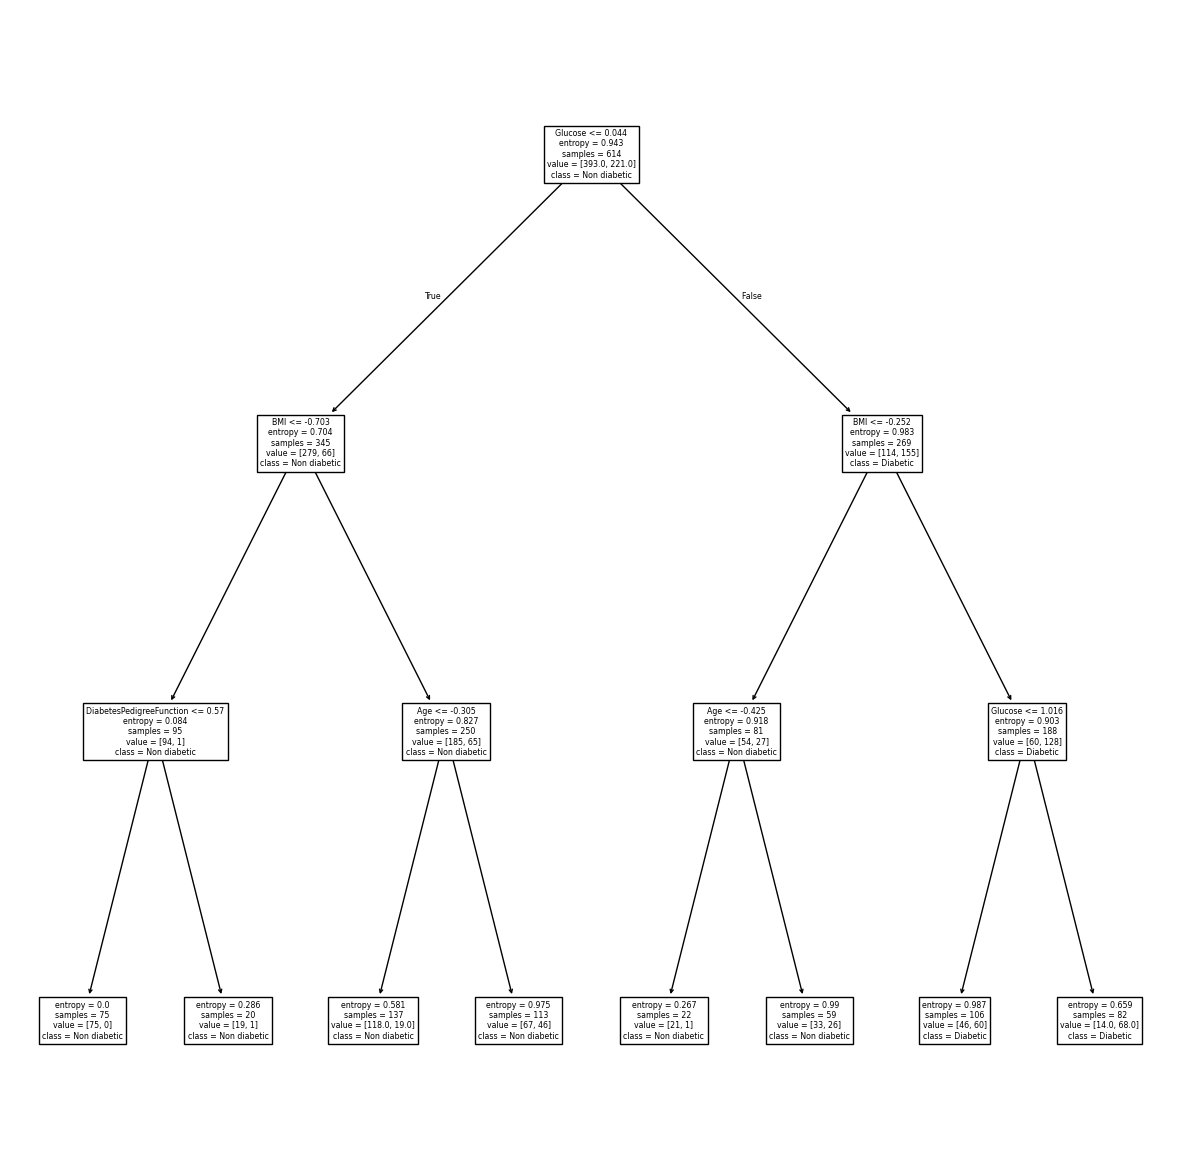

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,15))
tree.plot_tree(classifier, feature_names = df.columns.drop("Outcome"), class_names = ["Non diabetic", "Diabetic"])
plt.show()

**MODEL EVALUATION**

In [69]:
print(classifier.score(x_test, y_test))

0.7532467532467533


In [70]:
from sklearn.metrics import confusion_matrix as cm
print(cm(y_test, y_pred))

[[91 16]
 [22 25]]


In [71]:
from sklearn.metrics import mean_squared_error as mse
print(mse(y_test, y_pred))

0.24675324675324675


In [74]:
from sklearn.metrics import precision_score as ps
print(ps(y_test, y_pred))

0.6097560975609756


In [75]:
from sklearn.metrics import recall_score as rs
print(rs(y_test, y_pred))

0.5319148936170213


In [76]:
from sklearn.metrics import f1_score as f1s
print(f1s(y_test, y_pred))

0.5681818181818182
